In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torch import cuda

from util.model_validator import ModelValidator
from util.bert_trainer import BertTrainer
from util.review_dataset import ReviewDataset
from util.bert_class import BertClass

torch.manual_seed(1234)  # Für Vergleichbarkeit der Modelle
device = 'cuda' if cuda.is_available() else 'cpu'  # GPU benutzen

In [2]:
MAX_TEXT_LEN = 512
test_data = pd.read_csv("./resources/test.csv")
test_set = ReviewDataset(test_data, MAX_TEXT_LEN)
test_loader = DataLoader(test_set, batch_size=4)

Model loaded: model_bert_ep25_lr1e-05_drp0.2.pth
Last loss: 0.00013886917440686375
Model training time: 17.99h


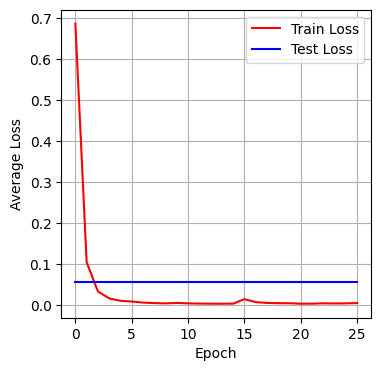

In [3]:
model = BertClass(dropout=0.2)
model.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-05)
trainer = BertTrainer(model, optimizer, None, test_loader)
loss_list, _ = trainer.load('model_bert_ep25_lr1e-05_drp0.2.pth')
test_loss = trainer.val_step()

losses_per_epoch = int(len(loss_list) / 25)
losses_array = np.array(loss_list).reshape(-1, losses_per_epoch)
avg_loss = np.mean(losses_array, axis=1)
avg_loss = np.insert(avg_loss, 0, loss_list[0])

plt.figure(figsize=(4, 4))
plt.plot(range(len(avg_loss)), avg_loss, '-r', label='Train Loss')
plt.plot(range(len(avg_loss)), [test_loss] * len(avg_loss), '-b', label='Test Loss')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

In [4]:
model_validator = ModelValidator(model, test_loader)
accuracy = model_validator.calc_accuracy()
print(f'Final Test Accuracy: {accuracy}')

Final Test Accuracy: 98.467
